In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
from fastf1 import plotting

In [2]:
ff1.Cache.get_cache_info()

(None, None)

In [3]:
ff1.Cache._get_size()

1879744857

In [4]:
ff1.Cache.clear_cache()

In [55]:
session = ff1.get_session(2025, 1, 'R')
session.name
session.date
session.event

'Race'

In [53]:
session.load()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No

In [7]:
session.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,,1.0,1,1.0,NaT,NaT,NaT,0 days 01:30:55.026000,Finished,25.0
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,,2.0,2,3.0,NaT,NaT,NaT,0 days 00:00:09.748000,Finished,18.0
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,,3.0,3,2.0,NaT,NaT,NaT,0 days 00:00:11.097000,Finished,15.0
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,,4.0,4,4.0,NaT,NaT,NaT,0 days 00:00:16.656000,Finished,12.0
31,31,E OCON,OCO,ocon,Haas F1 Team,B6BABD,haas,Esteban,Ocon,Esteban Ocon,...,,5.0,5,11.0,NaT,NaT,NaT,0 days 00:00:49.969000,Finished,10.0
12,12,K ANTONELLI,ANT,antonelli,Mercedes,27F4D2,mercedes,Kimi,Antonelli,Kimi Antonelli,...,,6.0,6,8.0,NaT,NaT,NaT,0 days 00:00:53.748000,Finished,8.0
23,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,,7.0,7,10.0,NaT,NaT,NaT,0 days 00:00:56.321000,Finished,6.0
87,87,O BEARMAN,BEA,bearman,Haas F1 Team,B6BABD,haas,Oliver,Bearman,Oliver Bearman,...,,8.0,8,17.0,NaT,NaT,NaT,0 days 00:01:01.303000,Finished,4.0
18,18,L STROLL,STR,stroll,Aston Martin,229971,aston_martin,Lance,Stroll,Lance Stroll,...,,9.0,9,14.0,NaT,NaT,NaT,0 days 00:01:10.204000,Finished,2.0
55,55,C SAINZ,SAI,sainz,Williams,64C4FF,williams,Carlos,Sainz,Carlos Sainz,...,,10.0,10,15.0,NaT,NaT,NaT,0 days 00:01:16.387000,Finished,1.0


In [8]:
laps = session.laps
laps.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [9]:
laps[laps['Driver'] == 'VER'].head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
168,0 days 01:00:45.351000,VER,1,0 days 00:01:42.249000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:30.530000,...,True,Red Bull Racing,0 days 00:59:02.863000,2025-03-23 07:03:38.698,12,6.0,False,,False,False
169,0 days 01:02:23.655000,VER,1,0 days 00:01:38.304000,2.0,1.0,NaT,NaT,0 days 00:00:26.397000,0 days 00:00:29.966000,...,True,Red Bull Racing,0 days 01:00:45.351000,2025-03-23 07:05:21.186,1,6.0,False,,False,True
170,0 days 01:04:01.957000,VER,1,0 days 00:01:38.302000,3.0,1.0,NaT,NaT,0 days 00:00:26.331000,0 days 00:00:29.992000,...,True,Red Bull Racing,0 days 01:02:23.655000,2025-03-23 07:06:59.490,12,6.0,False,,False,True
171,0 days 01:05:40.571000,VER,1,0 days 00:01:38.614000,4.0,1.0,NaT,NaT,0 days 00:00:26.373000,0 days 00:00:30.050000,...,True,Red Bull Racing,0 days 01:04:01.957000,2025-03-23 07:08:37.792,1,6.0,False,,False,True
172,0 days 01:07:19.466000,VER,1,0 days 00:01:38.895000,5.0,1.0,NaT,NaT,0 days 00:00:26.600000,0 days 00:00:30.175000,...,True,Red Bull Racing,0 days 01:05:40.571000,2025-03-23 07:10:16.406,1,6.0,False,,False,True


In [219]:
# Load FastF1's dark color scheme
plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False, color_scheme='fastf1')

req            INFO 	Using cached data for driver_info


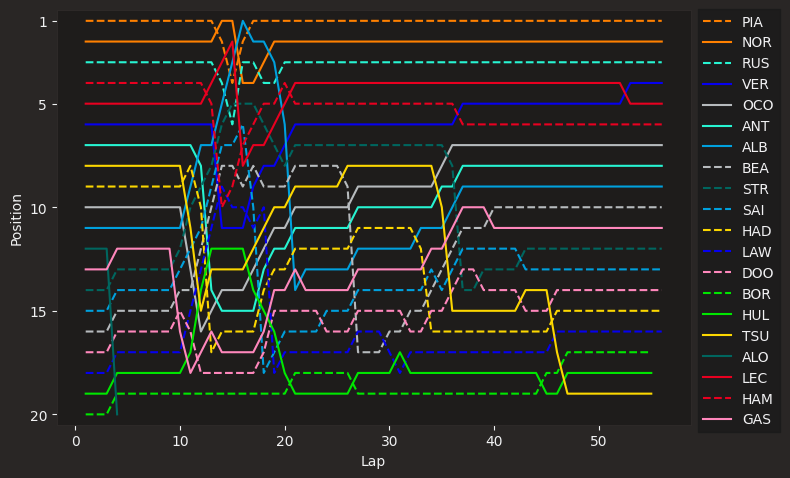

In [8]:
fig, ax = plt.subplots(figsize=(8.0, 4.9))

for drv in session.drivers:
    drv_laps = session.laps.pick_drivers(drv)

    abb = drv_laps['Driver'].iloc[0]
    style = plotting.get_driver_style(identifier=abb,
                                        style=['color', 'linestyle'],
                                        session=session)

    ax.plot(drv_laps['LapNumber'], drv_laps['Position'],
            label=abb, **style)

ax.set_ylim([20.5, 0.5])
ax.set_yticks([1, 5, 10, 15, 20])
ax.set_xlabel('Lap')
ax.set_ylabel('Position')
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.show()

In [ ]:
ver_lap = session.laps.pick_drivers('VER')
ver_tel = ver_lap.get_telemetry()
ver_tel.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2025-03-23 07:03:38.698,0 days 00:59:02.863000,,0.077778,0 days 00:00:00,10036.222222,0.0,1,15.0,True,1,interpolation,-0.006672,-2.214948e-08,OnTrack,-1142.001486,-1790.998995,139.0
3,2025-03-23 07:03:38.858,0 days 00:59:03.023000,,0.077778,0 days 00:00:00.160000,10066.000000,0.0,1,15.0,True,1,car,0.000000,0.000000e+00,OnTrack,-1142.002017,-1790.998638,139.0
4,2025-03-23 07:03:38.869,0 days 00:59:03.034000,,0.077778,0 days 00:00:00.171000,10062.837482,0.0,1,15.0,True,1,pos,0.000851,2.824579e-09,OnTrack,-1142.000000,-1791.000000,139.0
5,2025-03-23 07:03:39.018,0 days 00:59:03.183000,,0.077778,0 days 00:00:00.320000,10020.000000,0.0,1,15.0,True,1,car,0.000000,0.000000e+00,OnTrack,-1141.990696,-1791.006280,139.0
6,2025-03-23 07:03:39.029,0 days 00:59:03.194000,,0.077778,0 days 00:00:00.331000,9953.999616,0.0,1,15.0,True,1,pos,-0.003513,-1.166376e-08,OnTrack,-1142.000000,-1791.000000,139.0


In [7]:
ver_car = ver_lap.get_car_data()
ver_car.head()

NameError: name 'ver_lap' is not defined

### Laptimes

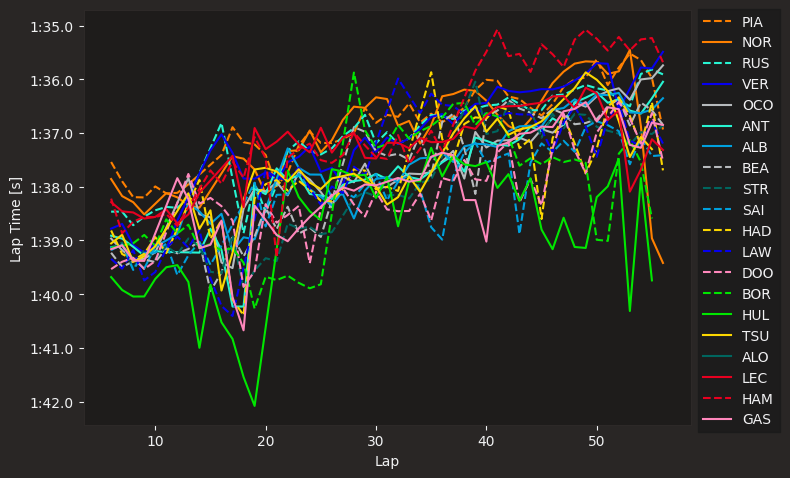

In [ ]:
# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

# loop through the drivers and plot the lap times in line scatter plot one in different colors
fig, ax = plt.subplots(figsize=(8.0, 4.9))
for drv in session.drivers:
    drv_laps = session.laps.pick_drivers(drv)

    abb = drv_laps['Driver'].iloc[0]
    style = plotting.get_driver_style(identifier=abb,
                                        style=['color', 'linestyle'],
                                        session=session)
    # take only the laps where the driver did not pit
    drv_laps = drv_laps[~drv_laps['PitInTime'].notna() & ~drv_laps['PitOutTime'].notna()]
    # select only laps after 5th lap
    drv_laps = drv_laps[drv_laps['LapNumber'] > 5]
    
    ax.plot(drv_laps['LapNumber'], drv_laps['LapTime'],
            label=abb, **style)
    
ax.invert_yaxis()
ax.set_xlabel('Lap')
ax.set_ylabel('Lap Time [s]')
ax.legend(bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()
plt.show()

### Gear shifts on Track

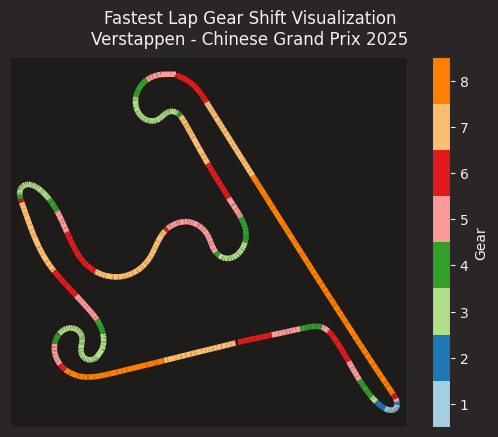

In [81]:
from matplotlib.collections import LineCollection
from matplotlib import colormaps

# take only the fastest lap of the driver
ver_fastest_lap = ver_lap.pick_fastest()
# take only the telemetry data of the driver fastest lap
ver_fastest_lap_tel = ver_fastest_lap.get_telemetry()

x = np.array(ver_fastest_lap_tel['X'].values)
y = np.array(ver_fastest_lap_tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1) # lines between points
gear = ver_fastest_lap_tel['nGear'].to_numpy().astype(float)

# Create a colormap from the built-in 'Paired' colormap
cmap = colormaps['Paired']
# Create a LineCollection object with the segments and colormap
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)

lc_comp.set_array(gear)
lc_comp.set_linewidth(4)

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

title = plt.suptitle(
    f"Fastest Lap Gear Shift Visualization\n"
    f"Verstappen - {session.event['EventName']} {session.event.year}"
)

cbar = plt.colorbar(mappable=lc_comp, label="Gear",
                    boundaries=np.arange(1, 10))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(np.arange(1, 9))


plt.show()

### Let's do some preprocessing

In [7]:
# functions
def convert_time(data, column, fillna_value=None):
    """convert the time column to seconds and set the first driver to 0 and NaN values to 200 seconds
    the input should look like this: "0 days 01:54:21.964000"  "0 days 00:00:10.933000"
    """
    # Convert to timedelta, then to float seconds
    data[column] = pd.to_timedelta(data[column]).dt.total_seconds()
    # set NaN values to 200 seconds (retired drivers)
    data[column] = data[column].fillna(fillna_value) if fillna_value is not None else data[column]
    return data

First the whole session results

In [54]:
session_results = session.results[['Abbreviation', 'TeamId', 'CountryCode', 'ClassifiedPosition', 'GridPosition', 'Time', 'Points']].copy()
# adding a new column called retired and fill it with 0
session_results['Retired'] = 0
# if ClassifiedPosition is 'R' then the driver retired
session_results.loc[session_results['ClassifiedPosition'] == 'R', 'Retired'] = 1
# put ClassifiedPosition to 20 if the driver retired
session_results.loc[session_results['ClassifiedPosition'] == 'R', 'ClassifiedPosition'] = 20
# convert Time column to timedelta with only seconds difference from the first driver
session_results = convert_time(session_results, 'Time', 200)
# set the first and biggest number which is the first driver in this column to 0 because only the first driver has 1 hour and 50 minutes
# and the others are relative to this driver - so the first dirver is 6861 seconds for instance and the second driver is 2.0
session_results.at[session_results.index[0], 'Time'] = 0.0
# get country name and to the data
session_results['CountryCode'] = session.event.Country
# get Location
session_results['Location'] = session.event.Location
# rename some columns
session_results.columns = ['Driver', 'TeamId', 'Country', 'FinalPosition', 'GridPosition', 'RaceTimeDiff', 'Points', 'Retired', 'Location']

session_results.head(3)

,Driver,TeamId,Country,FinalPosition,GridPosition,RaceTimeDiff,Points,Retired,Location
4,NOR,mclaren,Australia,1,1.0,0.000,25.0,0,Melbourne
1,VER,red_bull,Australia,2,3.0,0.895,18.0,0,Melbourne
63,RUS,mercedes,Australia,3,4.0,8.481,15.0,0,Melbourne


Second the laps data

In [9]:
import mappings

session_laps = session.laps[['LapNumber', 'Driver', 'LapTime', 'Compound', 'TyreLife', 'Stint', 'FreshTyre', 'Team', 'TrackStatus', 
                             'Position', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'LapStartTime']].copy()

# convert LapTime column to seconds and set NaT values as 0
session_laps = convert_time(session_laps, 'LapTime', 0)
# doing this also for the sector times
session_laps = convert_time(session_laps, 'Sector1Time', 0)
session_laps = convert_time(session_laps, 'Sector2Time', 0)
session_laps = convert_time(session_laps, 'Sector3Time', 0)
session_laps = convert_time(session_laps, 'LapStartTime', 0)
# set Speed trap columns to 0 if they are NaN
session_laps['SpeedFL'] = session_laps['SpeedFL'].fillna(0)
session_laps['SpeedST'] = session_laps['SpeedST'].fillna(0)
session_laps['SpeedI1'] = session_laps['SpeedST'].fillna(0)
session_laps['SpeedI2'] = session_laps['SpeedST'].fillna(0)
# set Position as 20 if it is NaN (retired drivers)
session_laps['Position'] = session_laps['Position'].fillna(-1)
# convert LapStartTime name to SessionTime
session_laps.rename(columns={'LapStartTime': 'SessionTime'}, inplace=True)
# fresh tyre column to 0 and 1
session_laps['FreshTyre'] = session_laps['FreshTyre'].apply(lambda x: 1 if x else 0)
# map the compound names to the compound id
session_laps['Compound'] = session_laps['Compound'].map(mappings.compounds)
# map the team names to the team id
session_laps['Team'] = session_laps['Team'].map(mappings.teams)
# map driver names to the driver id
session_laps['Driver'] = session_laps['Driver'].map(mappings.drivers)

session_laps

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST,SessionTime
0,1.0,31,98.344,1,1.0,1.0,1,4.0,12,1.0,0.000,28.932,41.859,308.0,308.0,256.0,308.0,3542.863
1,2.0,31,97.551,1,2.0,1.0,1,4.0,1,1.0,26.193,29.261,42.097,311.0,311.0,255.0,311.0,3641.446
2,3.0,31,97.689,1,3.0,1.0,1,4.0,12,1.0,26.011,29.486,42.192,310.0,310.0,256.0,310.0,3738.997
3,4.0,31,97.804,1,4.0,1.0,1,4.0,1,1.0,26.345,29.430,42.029,313.0,313.0,256.0,313.0,3836.686
4,5.0,31,98.082,1,5.0,1.0,1,4.0,1,1.0,26.312,29.729,42.041,313.0,313.0,256.0,313.0,3934.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,52.0,12,96.556,2,42.0,2.0,1,3.0,1,11.0,25.628,28.965,41.963,304.0,304.0,261.0,304.0,8580.617
1061,53.0,12,97.220,2,43.0,2.0,1,3.0,1,11.0,25.942,29.123,42.155,303.0,303.0,261.0,303.0,8677.173
1062,54.0,12,97.275,2,44.0,2.0,1,3.0,1,11.0,25.836,29.054,42.385,306.0,306.0,260.0,306.0,8774.393
1063,55.0,12,96.805,2,45.0,2.0,1,3.0,1,11.0,25.736,28.913,42.156,309.0,309.0,262.0,309.0,8871.668


**Columns that needs to be Embedded in RNN model:**

    Driver 
    Team
    Compound 
    TrackStatus : ['1', '12', '24', '4', '41', '124', '412', '21']

In [30]:
session.laps['Team'].unique()

array(['McLaren', 'Mercedes', 'Red Bull Racing', 'Haas F1 Team',
       'Williams', 'Aston Martin', 'Racing Bulls', 'Alpine',
       'Kick Sauber', 'Ferrari'], dtype=object)

Third weather data

In [11]:
session_laps['Compound'].unique()

array([1, 2])

In [12]:
session_weather = session.weather_data.copy()
# convert Time to seconds
session_weather = convert_time(session_weather, 'Time')
# convert Rainfall to 0 and 1
session_weather['Rainfall'] = session_weather['Rainfall'].apply(lambda x: 1 if x else 0)
# convert the name of Time in column to SessionTime
session_weather.rename(columns={'Time': 'SessionTime'}, inplace=True)
session_weather


,SessionTime,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,44.889,27.5,16.0,1011.2,0,42.2,230,2.7
1,104.889,27.5,16.0,1011.3,0,42.2,258,2.6
2,164.910,27.6,16.0,1011.3,0,42.5,244,2.1
3,224.920,27.6,16.0,1011.3,0,42.6,254,2.1
4,284.942,27.7,16.0,1011.3,0,42.7,248,3.3
...,...,...,...,...,...,...,...,...
149,8985.651,26.5,21.0,1010.3,0,30.7,219,2.6
150,9045.656,26.5,22.0,1010.2,0,30.7,259,1.1
151,9105.674,26.4,22.0,1010.2,0,30.7,288,1.0
152,9165.673,26.4,22.0,1010.2,0,30.6,262,2.2


In [13]:
# joining the laps and weather data:
session_laps.sort_values("SessionTime", inplace=True)
session_weather.sort_values("SessionTime", inplace=True)

# Merge each lap with the closest weather measurement
merged = pd.merge_asof(session_laps, session_weather, on="SessionTime", direction="nearest")
merged

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,...,SpeedFL,SpeedST,SessionTime,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,1.0,31,98.344,1,1.0,1.0,1,4.0,12,1.0,...,256.0,308.0,3542.863,27.3,18.0,1010.4,0,35.9,261,1.8
1,1.0,9,100.282,1,1.0,1.0,1,0.0,12,3.0,...,254.0,312.0,3542.863,27.3,18.0,1010.4,0,35.9,261,1.8
2,1.0,0,100.792,1,1.0,1.0,1,2.0,12,4.0,...,258.0,314.0,3542.863,27.3,18.0,1010.4,0,35.9,261,1.8
3,1.0,1,102.249,1,1.0,1.0,1,12.0,12,6.0,...,258.0,314.0,3542.863,27.3,18.0,1010.4,0,35.9,261,1.8
4,1.0,4,101.763,1,1.0,1.0,1,2.0,12,5.0,...,259.0,312.0,3542.863,27.3,18.0,1010.4,0,35.9,261,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,56.0,20,96.861,1,20.0,2.0,0,6.0,1,12.0,...,263.0,310.0,8971.471,26.5,21.0,1010.3,0,30.7,219,2.6
1061,56.0,7,97.411,2,39.0,2.0,1,8.0,1,13.0,...,262.0,312.0,8977.104,26.5,21.0,1010.3,0,30.7,219,2.6
1062,56.0,36,97.522,2,45.0,2.0,1,3.0,1,14.0,...,258.0,308.0,8979.007,26.5,21.0,1010.3,0,30.7,219,2.6
1063,56.0,35,97.695,2,23.0,3.0,1,NaN,1,15.0,...,263.0,337.0,8979.308,26.5,21.0,1010.3,0,30.7,219,2.6


In [14]:
session_laps=merged.copy()

Third the telemetry data

In [15]:
def aggregate_lap(lap_telemetry):
    result = {}
    # Check if lap_telemetry is empty
    if lap_telemetry.empty:
        result.update({
            "RpmAvg": None, "RpmMin": None, "RpmMax": None,
            "SpeedAvg": None, "SpeedMedian": None, "SpeedMin": None, "SpeedMax": None,
            "ThrottleAvg": None, "ThrottleMin": None, "ThrottleMax": None,
            "nGearAvg": None, "nGearMin": None, "nGearMax": None,
            "BrakeCount": 0, "DrsCount": 0, "nGearMode": None
        })
        return result

    # RPM statistics
    result["RpmAvg"] = lap_telemetry["RPM"].mean()
    result["RpmMin"] = lap_telemetry["RPM"].min()
    result["RpmMax"] = lap_telemetry["RPM"].max()

    # Speed statistics
    result["SpeedAvg"] = lap_telemetry["Speed"].mean()
    result["SpeedMedian"] = lap_telemetry["Speed"].median()
    result["SpeedMin"] = lap_telemetry["Speed"].min()
    result["SpeedMax"] = lap_telemetry["Speed"].max()

    # Throttle statistics
    result["ThrottleAvg"] = lap_telemetry["Throttle"].mean()
    result["ThrottleMin"] = lap_telemetry["Throttle"].min()
    result["ThrottleMax"] = lap_telemetry["Throttle"].max()

    # nGear statistics
    result["nGearAvg"] = lap_telemetry["nGear"].mean()
    result["nGearMin"] = lap_telemetry["nGear"].min()
    result["nGearMax"] = lap_telemetry["nGear"].max()

    # Brake and DRS counts (assuming a value > 0 indicates activation)
    result["BrakeCount"] = (lap_telemetry["Brake"] > 0).sum()
    result["DrsCount"] = (lap_telemetry["DRS"] > 0).sum()

    # Mode for nGear
    modes = lap_telemetry["nGear"].mode()
    result["nGearMode"] = modes.iloc[0] if not modes.empty else None

    return result

In [25]:
def calculate_lap_agg_telemetry(driver_laps, driver_car):
    # sort by session time
    driver_laps.sort_values("SessionTime", inplace=True)
    # Prepare a list to store aggregated results for each lap.
    lap_aggregates = []
    # We will treat the start of the session as time 0.
    prev_time = driver_laps["SessionTime"].min()
    # Iterate over each lap (using the SessionTime as the lap boundary)
    for idx, row in driver_laps.iterrows():
        lap_end = row["SessionTime"] + row["LapTime"]
        # Select telemetry data for the current lap interval:
        lap_telemetry = driver_car[(driver_car["SessionTime"] > prev_time) & (driver_car["SessionTime"] <= lap_end)]
        
        # Aggregate telemetry for this lap
        agg_result = aggregate_lap(lap_telemetry)
        # set row number as lap number
        agg_result["LapNumber"] = row["LapNumber"] if "LapNumber" in row else idx
        # Add the aggregated result for this lap.
        lap_aggregates.append(agg_result)
        # Update the previous lap boundary to the current lap's SessionTime.
        prev_time = lap_end

    # Convert the list of dictionaries to a DataFrame.
    driver_summary = pd.DataFrame(lap_aggregates)
    # join this dataframe to driver_laps dataframe
    driver_laps = pd.merge(driver_laps, driver_summary, on="LapNumber", how="left")
    return driver_laps


In [26]:
# selecting the drivers
drivers=session.laps['Driver'].unique()
# defining columns that needs to be calculated
columns = ['RpmAvg', 'RpmMin', 'RpmMax', 'SpeedAvg', 'SpeedMedian', 'SpeedMin', 'SpeedMax',
           'ThrottleAvg', 'ThrottleMin', 'ThrottleMax', 'BrakeCount', 'DrsCount', 'nGearAvg', 'nGearMin', 'nGearMax', 'nGearMode']
# define an empty dataframe to store the final results
session_laps_final = pd.DataFrame()
# loop through the drivers to create a summary statistic for each telemetry data
for drv in drivers:
    # get car data for the driver
    driver_car = session.laps.pick_drivers(drv).get_car_data()
    # convert Time into milliseconds
    driver_car = convert_time(driver_car, 'Time')
    driver_car = convert_time(driver_car, 'SessionTime')
    # sort by SessionTime
    driver_car.sort_values("SessionTime", inplace=True)
    # drop Source and Date columns
    driver_car.drop(columns=['Source', 'Date'], inplace=True)
    # rename some columns
    driver_car.columns = ['RPM', 'Speed', 'nGear', 'Throttle' , 'Brake', 'DRS', 'DrivingTime', 'SessionTime']
    # convert brake into 0 and 1
    driver_car['Brake'] = driver_car['Brake'].apply(lambda x: 1 if x else 0)
    # select laps for the driver from laps data
    driver_laps = session_laps[session_laps['Driver'] == mappings.drivers[drv]].copy()
    # calculate lap statistics for each driver
    driver_laps = calculate_lap_agg_telemetry(driver_laps, driver_car)
    # add the driver laps to the session laps
    session_laps_final = pd.concat([session_laps_final, driver_laps], ignore_index=True) if not session_laps_final.empty else driver_laps.copy()

session_laps_final

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,...,SpeedMax,ThrottleAvg,ThrottleMin,ThrottleMax,nGearAvg,nGearMin,nGearMax,BrakeCount,DrsCount,nGearMode
0,1.0,31,98.344,1,1.0,1.0,1,4.0,12,1.0,...,309.0,61.714681,0.0,99.0,4.689751,1,8,63,361,6
1,2.0,31,97.551,1,2.0,1.0,1,4.0,1,1.0,...,313.0,60.134771,0.0,99.0,5.070081,2,8,80,63,3
2,3.0,31,97.689,1,3.0,1.0,1,4.0,12,1.0,...,312.0,58.019663,0.0,99.0,4.977528,2,8,73,0,3
3,4.0,31,97.804,1,4.0,1.0,1,4.0,1,1.0,...,313.0,59.278075,0.0,99.0,4.975936,2,8,80,0,3
4,5.0,31,98.082,1,5.0,1.0,1,4.0,1,1.0,...,313.0,60.942149,0.0,99.0,4.955923,2,8,65,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,52.0,12,96.556,2,42.0,2.0,1,3.0,1,11.0,...,311.0,65.605634,0.0,100.0,5.056338,2,8,64,0,3
1061,53.0,12,97.220,2,43.0,2.0,1,3.0,1,11.0,...,310.0,63.330667,0.0,100.0,5.090667,2,8,79,0,3
1062,54.0,12,97.275,2,44.0,2.0,1,3.0,1,11.0,...,312.0,64.743094,0.0,100.0,5.154696,2,8,63,0,3
1063,55.0,12,96.805,2,45.0,2.0,1,3.0,1,11.0,...,311.0,63.361878,0.0,100.0,5.102210,2,8,70,0,3


In [22]:
#get car data for 'VER'
ver_car = session.laps.pick_drivers('VER').get_car_data()
# convert Time into milliseconds
ver_car = convert_time(ver_car, 'Time')
ver_car = convert_time(ver_car, 'SessionTime')
# drop Source and Date columns
ver_car.drop(columns=['Source', 'Date'], inplace=True)
# rename some columns
ver_car.columns = ['RPM', 'Speed', 'nGear', 'Throttle' , 'Brake', 'DRS', 'DrivingTime', 'SessionTime']
# convert brake into 0 and 1
ver_car['Brake'] = ver_car['Brake'].apply(lambda x: 1 if x else 0)

ver_car

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime
0,2025-03-23 07:03:38.858,10066.0,0.0,1,15.0,1,1,car,0.160,3543.023
1,2025-03-23 07:03:39.018,10020.0,0.0,1,15.0,1,1,car,0.320,3543.183
2,2025-03-23 07:03:39.298,8340.0,0.0,1,15.0,0,1,car,0.600,3543.463
3,2025-03-23 07:03:39.738,5260.0,22.0,1,16.0,0,1,car,1.040,3543.903
4,2025-03-23 07:03:40.018,4384.0,28.0,1,23.0,0,1,car,1.320,3544.183
...,...,...,...,...,...,...,...,...,...,...
20464,2025-03-23 08:34:49.317,11174.0,249.0,6,100.0,0,0,car,5470.619,9013.482
20465,2025-03-23 08:34:49.597,11416.0,255.0,6,100.0,0,0,car,5470.899,9013.762
20466,2025-03-23 08:34:49.917,11547.0,260.0,6,100.0,0,0,car,5471.219,9014.082
20467,2025-03-23 08:34:50.237,11085.0,264.0,6,100.0,0,0,car,5471.539,9014.402


In [276]:
ver_pos = session.laps.pick_drivers(['VER']).get_pos_data()
# convert Time into milliseconds
ver_pos = convert_time(ver_pos, 'Time')
ver_pos = convert_time(ver_pos, 'SessionTime')

ver_pos.drop(columns=['Date', 'Source'], inplace=True)
# convert Status into 0 and 1
ver_pos['Status'] = ver_pos['Status'].apply(lambda x: 1 if x == 'OnTrack' else 0)
# rename some columns
ver_pos.columns = ['Status', 'X', 'Y', 'Z', 'DrivingTime', 'SessionTime']

ver_pos

,Status,X,Y,Z,DrivingTime,SessionTime
0,1,163.0,-1461.0,7214.0,0.147,1967.153
1,1,163.0,-1461.0,7214.0,0.367,1967.373
2,1,163.0,-1461.0,7214.0,0.587,1967.593
3,1,163.0,-1461.0,7214.0,0.807,1967.813
4,1,163.0,-1461.0,7214.0,1.027,1968.033
...,...,...,...,...,...,...
3498,1,-2242.0,4999.0,7675.0,767.466,2734.472
3499,1,-2145.0,4992.0,7671.0,767.686,2734.692
3500,1,-2059.0,4987.0,7667.0,767.906,2734.912
3501,1,-1957.0,4982.0,7663.0,768.126,2735.132


Now we can add some manual columns to improve our data. I added a file drivers.json

In [32]:
# import drivers.json as dictionary
import json
with open('drivers.json') as f:
    drivers = json.load(f)

for driver in drivers['drivers']:
    if driver['abbreviation'] == 'VER':
        print(driver)

{'abbreviation': 'VER', 'name': 'Max Verstappen', 'age': 28, 'team': 'Red Bull Racing', 'dateOfBirth': '1997-09-30', 'nationality': 'Dutch', 'podiums': 113, 'DHL Fastest Lap': 33, 'GPs Entered': 211}


In [34]:
# Add age of the driver, exprience and achievements to the session results
for drv in session_results['Driver'].unique():
    # get the driver data from the json
    driver_info = next((driver for driver in drivers['drivers'] if driver['abbreviation'] == drv), None)

    if driver_info is None:
        continue
    
    session_results.loc[session_results['Driver'] == drv, 'Age'] = driver_info['age']
    session_results.loc[session_results['Driver'] == drv , 'Exprience'] = driver_info['GPs Entered']
    session_results.loc[session_results['Driver'] == drv , 'Achievements'] = driver_info['podiums']
    session_results.loc[session_results['Driver'] == drv , 'AchievementsByTime'] = driver_info['podiums'] / driver_info['GPs Entered']

session_results.drop(columns=['TeamId', 'CountryCode'], inplace=True)

session_results

,Driver,FinalPosition,GridPosition,RaceTimeDiff,Points,Retired,Age,Exprience,Achievements,AchievementsByTime
81,PIA,1,1.0,0.000,25.0,0,24.0,48.0,11.0,0.229167
4,NOR,2,3.0,9.748,18.0,0,26.0,130.0,28.0,0.215385
63,RUS,3,2.0,11.097,15.0,0,27.0,130.0,17.0,0.130769
1,VER,4,4.0,16.656,12.0,0,28.0,211.0,113.0,0.535545
31,OCO,5,11.0,49.969,10.0,0,29.0,158.0,4.0,0.025316
12,ANT,6,8.0,53.748,8.0,0,19.0,2.0,0.0,0.000000
23,ALB,7,10.0,56.321,6.0,0,29.0,106.0,2.0,0.018868
87,BEA,8,17.0,61.303,4.0,0,20.0,5.0,0.0,0.000000
18,STR,9,14.0,70.204,2.0,0,28.0,168.0,3.0,0.017857
55,SAI,10,15.0,76.387,1.0,0,31.0,208.0,27.0,0.129808


In [35]:
# map driver names to the driver id
session_results['Driver'] = session_results['Driver'].map(mappings.drivers)

In [36]:
# join the session laps result with driver info and final results
session_laps_final_with_result = pd.merge(session_laps_final, session_results, on='Driver', how='left')
session_laps_final_with_result

,LapNumber,Driver,LapTime,Compound,TyreLife,Stint,FreshTyre,Team,TrackStatus,Position,...,nGearMode,FinalPosition,GridPosition,RaceTimeDiff,Points,Retired,Age,Exprience,Achievements,AchievementsByTime
0,1.0,31,98.344,1,1.0,1.0,1,4.0,12,1.0,...,6,1,1.0,0.0,25.0,0,24.0,48.0,11.0,0.229167
1,2.0,31,97.551,1,2.0,1.0,1,4.0,1,1.0,...,3,1,1.0,0.0,25.0,0,24.0,48.0,11.0,0.229167
2,3.0,31,97.689,1,3.0,1.0,1,4.0,12,1.0,...,3,1,1.0,0.0,25.0,0,24.0,48.0,11.0,0.229167
3,4.0,31,97.804,1,4.0,1.0,1,4.0,1,1.0,...,3,1,1.0,0.0,25.0,0,24.0,48.0,11.0,0.229167
4,5.0,31,98.082,1,5.0,1.0,1,4.0,1,1.0,...,7,1,1.0,0.0,25.0,0,24.0,48.0,11.0,0.229167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,52.0,12,96.556,2,42.0,2.0,1,3.0,1,11.0,...,3,D,16.0,200.0,0.0,0,29.0,155.0,5.0,0.032258
1061,53.0,12,97.220,2,43.0,2.0,1,3.0,1,11.0,...,3,D,16.0,200.0,0.0,0,29.0,155.0,5.0,0.032258
1062,54.0,12,97.275,2,44.0,2.0,1,3.0,1,11.0,...,3,D,16.0,200.0,0.0,0,29.0,155.0,5.0,0.032258
1063,55.0,12,96.805,2,45.0,2.0,1,3.0,1,11.0,...,3,D,16.0,200.0,0.0,0,29.0,155.0,5.0,0.032258


In [39]:
session_laps_final_with_result.columns

Index(['LapNumber', 'Driver', 'LapTime', 'Compound', 'TyreLife', 'Stint',
       'FreshTyre', 'Team', 'TrackStatus', 'Position', 'Sector1Time',
       'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL',
       'SpeedST', 'SessionTime', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall',
       'TrackTemp', 'WindDirection', 'WindSpeed', 'RpmAvg', 'RpmMin', 'RpmMax',
       'SpeedAvg', 'SpeedMedian', 'SpeedMin', 'SpeedMax', 'ThrottleAvg',
       'ThrottleMin', 'ThrottleMax', 'nGearAvg', 'nGearMin', 'nGearMax',
       'BrakeCount', 'DrsCount', 'nGearMode', 'FinalPosition', 'GridPosition',
       'Age', 'Exprience', 'Achievements', 'AchievementsByTime'],
      dtype='object')

In [37]:
# we have to drop points, RacetimeDif and Retired column because it will leak the result to the model
session_laps_final_with_result.drop(columns=['Points', 'RaceTimeDiff', 'Retired'], inplace=True)

### Some Ideas to go forward:

Car and position data are time series data which is not usable for our ML model. We have to try different methods to aggregate data into one row for each driver. It can be one row for each lap. Or one row for each Session.

We can also train a model using practice and Qualifying sessions and laps to predict the race.

One other method is transposing time series into columns and the aggregate through time series.

### Predicting Result Lap-By-Lap

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

# --- Hyperparameters ---
num_features_per_lap = 46    # Calculated based on your prepared data
num_drivers = 20        # Max number of drivers you expect in a race
lstm_units = 64        # Example: Number of hidden units in LSTM layer
dense_units = 32       # Example: Number of units in intermediate dense layer
num_unique_drivers = len(mappings.drivers) + 1    # +1 for padding
num_unique_teams = len(mappings.teams) + 1     # +1 for padding
num_unique_compounds = len(mappings.compounds) + 1    # +1 for padding
num_unique_track_status = len(session_laps['TrackStatus']) + 1    # +1 for padding
num_numerical_features = 42

# Conceptual Multi-Input for Embeddin + Numerical
# --- Inputs ---
lap_numerical_input = layers.Input(shape=(None, num_numerical_features), name='numerical_features')
driver_id_input = layers.Input(shape=(None,), name='driver_ids') # Sequence of driver IDs per lap
team_id_input = layers.Input(shape=(None,), name='team_ids')   # Sequence of team IDs per lap
compound_input = layers.Input(shape=(None,), name='compound_ids') # Sequence of compound IDs per lap
track_status_input = layers.Input(shape=(None,), name='trackStatus_ids') # Sequence of track status per lap

# --- Embeddings ---
driver_embedding = layers.Embedding(input_dim=num_unique_drivers, output_dim=8, name='driver_embedding')(driver_id_input)
team_embedding = layers.Embedding(input_dim=num_unique_teams, output_dim=4, name='team_embedding')(team_id_input)
compound_embedding = layers.Embedding(input_dim=num_unique_compounds, output_dim=4, name='compound_embedding')(compound_input)
track_status_embedding = layers.Embedding(input_dim=num_unique_track_status, output_dim=4, name='track_status_embedding')(track_status_input)

# --- Combine Features ---
# Concatenate along the feature dimension (axis=-1)
concatenated_features = layers.Concatenate(axis=-1)([lap_numerical_input, driver_embedding, team_embedding, 
                                                     compound_embedding, track_status_embedding])

# --- Model Definition ---
# Input for a single driver's sequence of lap data
# 'None' allows for variable sequence lengths (number of laps)
driver_input = layers.Input(shape=(None, num_features_per_lap), name='driver_lap_sequence')

# LSTM Layer: Processes the sequence.
# return_sequences=False because we only need the output after the *last* time step
# If stacking LSTMs, the earlier ones need return_sequences=True
lstm_out = layers.LSTM(lstm_units, name='lstm_layer')(driver_input)

# Optional: Add Dense layers for further processing
dense_out = layers.Dense(dense_units, activation='relu', name='dense_layer')(lstm_out)
# Optional: Dropout for regularization
# dense_out = layers.Dropout(0.3)(dense_out)

# Output Layer: Predicts a score for this driver
# Linear activation because we are predicting a score, not a probability
driver_score = layers.Dense(1, activation='linear', name='driver_score')(dense_out)

# This defines a model processing ONE driver's sequence to ONE score.
# To handle all drivers, you could potentially:
#  A) Run this model N times (once per driver) - inefficient.
#  B) Use a TimeDistributed wrapper around Dense layers if input was structured differently.
#  C) Re-structure the input/output entirely (e.g., input shape (None, N * F) ?) - complex.

# A more practical Keras approach for this specific ranking problem:
# Let's assume input shape handles all drivers implicitly or explicitly.
# For simplicity, let's redefine assuming the input sequence captures state for ranking:
# This might require careful feature engineering reflecting relative positions etc.

sequence_input = layers.Input(shape=(None, num_features_per_lap), name='race_lap_sequence') # Input represents overall race state per lap maybe?

# LSTM processes the sequence of race states
# Using GRU as an alternative example
gru_layer = layers.GRU(lstm_units * 2, return_sequences=False, name='gru_layer')(sequence_input) # More units potentially

# Dense layers process the final state from the RNN
x = layers.Dense(dense_units * 2, activation='relu', name='dense_1')(gru_layer)
x = layers.Dropout(0.3)(x)
x = layers.Dense(dense_units, activation='relu', name='dense_2')(x)

# Final Output Layer: One score per driver
# Assumes num_drivers is fixed or padded to a max number (N)
final_scores = layers.Dense(num_drivers, activation='linear', name='final_driver_scores')(x)

model1 = keras.Model(inputs=sequence_input, outputs=final_scores)

# --- Compilation ---
# Use Mean Squared Error if target is numerical scores.
# Other ranking losses exist but are more complex (e.g., pairwise losses).
model1.compile(optimizer='adam', loss='mse') # Mean Squared Error is a common start

model1.summary()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer # Or MinMaxScaler
from keras.preprocessing.sequence import pad_sequences

# --- Assumed Setup ---
# Assume 'session_laps_final_with_result' is your Pandas DataFrame
# Assume 'mappings' is an object or dictionary holding your label encodings/mappings
# Assume DataFrame has columns like:
# 'Year', 'RaceName', 'TrackID' (or similar for grouping races)
# 'DriverID_encoded', 'TeamID_encoded', 'CompoundID_encoded', 'TrackStatus_encoded' (integer encoded IDs)
# 'LapNumber'
# Numerical feature columns (e.g., 'LapTimeSec', 'GapToLeader', 'TyreAge', etc.) - list these explicitly
# 'FinalPosition' (The actual final position for the driver in that race)

# --- Hyperparameters ---
# Feature counts need to be precise based on your preprocessing
NUM_NUMERICAL_FEATURES = 42 # The number of numerical columns you are using *per lap*
NUM_DRIVERS = 38            # Max drivers to predict scores for (pad if needed)
LSTM_UNITS = 128            # Increased units for potentially complex sequences
DENSE_UNITS = 64            # Units in the hidden dense layer
DROPOUT_RATE = 0.3          # Dropout for regularization
LEARNING_RATE = 0.001       # Learning rate for the optimizer

# Embedding dimensions (adjust based on cardinality and experimentation)
DRIVER_EMBED_DIM = 8
TEAM_EMBED_DIM = 4
COMPOUND_EMBED_DIM = 4
TRACK_STATUS_EMBED_DIM = 3

# Get unique counts for embedding input_dim (+1 for potential masking/unknown)
# Ensure your encoded IDs start from 1, or adjust logic if they start from 0
# If IDs start from 0, input_dim should be len(mappings...)
num_unique_drivers = len(mappings.drivers) + 1    # +1 for padding
num_unique_teams = len(mappings.teams) + 1     # +1 for padding
num_unique_compounds = len(mappings.compounds) + 1    # +1 for padding
num_unique_track_status = len(session_laps['TrackStatus']) + 1    # +1 for padding

# --- Define Explicit Numerical Feature Columns ---
# !! IMPORTANT: Replace with your ACTUAL numerical column names !!
numerical_feature_cols = [
    'LapNumber', 'LapTime', 'TyreLife', 'Stint', 'FreshTyre', 'Position', 'Sector1Time',
    'Sector2Time', 'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL',
    'SpeedST', 'SessionTime', 'AirTemp', 'Humidity', 'Pressure', 'Rainfall',
    'TrackTemp', 'WindDirection', 'WindSpeed', 'RpmAvg', 'RpmMin', 'RpmMax',
    'SpeedAvg', 'SpeedMedian', 'SpeedMin', 'SpeedMax', 'ThrottleAvg',
    'ThrottleMin', 'ThrottleMax', 'nGearAvg', 'nGearMin', 'nGearMax',
    'BrakeCount', 'DrsCount', 'nGearMode', 'FinalPosition', 'GridPosition',
    'Age', 'Exprience', 'Achievements', 'AchievementsByTime'
]
# Verify: assert len(numerical_feature_cols) == NUM_NUMERICAL_FEATURES

# --- Define Categorical Feature Columns (Encoded) ---
driver_id_col = 'Driver'
team_id_col = 'Team'
compound_id_col = 'Compound'
track_status_col = 'TrackStatus'

# --- Input Layers ---
# Define inputs for each type of feature. Shape is (sequence_length,) for IDs
# and (sequence_length, num_features) for numerical data. 'None' allows variable length.
lap_numerical_input = layers.Input(shape=(None, NUM_NUMERICAL_FEATURES), name='numerical_features')
driver_id_input = layers.Input(shape=(None,), name='driver_ids')
team_id_input = layers.Input(shape=(None,), name='team_ids')
compound_input = layers.Input(shape=(None,), name='compound_ids')
track_status_input = layers.Input(shape=(None,), name='trackStatus_ids')

# --- Embedding Layers ---
# Convert integer IDs into dense, learned vectors.
# mask_zero=True can be useful if you use 0 for padding your ID sequences.
driver_embedding_layer = layers.Embedding(input_dim=num_unique_drivers, output_dim=DRIVER_EMBED_DIM, name='driver_embedding', mask_zero=True)
team_embedding_layer = layers.Embedding(input_dim=num_unique_teams, output_dim=TEAM_EMBED_DIM, name='team_embedding', mask_zero=True)
compound_embedding_layer = layers.Embedding(input_dim=num_unique_compounds, output_dim=COMPOUND_EMBED_DIM, name='compound_embedding', mask_zero=True)
track_status_embedding_layer = layers.Embedding(input_dim=num_unique_track_status, output_dim=TRACK_STATUS_EMBED_DIM, name='track_status_embedding', mask_zero=True)

# Apply embedding layers to corresponding inputs
driver_embedding = driver_embedding_layer(driver_id_input)
team_embedding = team_embedding_layer(team_id_input)
compound_embedding = compound_embedding_layer(compound_input)
track_status_embedding = track_status_embedding_layer(track_status_input)

# --- Masking Layer for Numerical Inputs ---
# Explicitly mask padding values (assuming 0 is used for padding numerical features)
# This ensures LSTM ignores padded time steps for numerical data too.
numerical_masked = layers.Masking(mask_value=0.0)(lap_numerical_input)

# --- Concatenate Features ---
# Combine numerical features and the output of embedding layers side-by-side.
# Axis=-1 refers to the feature axis.
concatenated_features = layers.Concatenate(axis=-1)([
    numerical_masked, # Use masked numerical input
    driver_embedding,
    team_embedding,
    compound_embedding,
    track_status_embedding
])
# Expected shape here: (batch_size, sequence_length, NUM_NUMERICAL_FEATURES + DRIVER_EMBED_DIM + ...)

# --- Recurrent Layer (LSTM) ---
# Processes the sequence of concatenated features.
# return_sequences=False because we only need the final output state to predict the race outcome.
# Add recurrent_dropout for regularization within the LSTM time steps.
lstm_layer = layers.LSTM(LSTM_UNITS, dropout=DROPOUT_RATE, recurrent_dropout=DROPOUT_RATE, name='lstm_layer')
lstm_output = lstm_layer(concatenated_features) # The masking is automatically propagated

# --- Dense Layers for Final Processing ---
# Further process the LSTM output. Add Dropout for regularization.
dense_1 = layers.Dense(DENSE_UNITS, activation='relu', name='dense_1')(lstm_output)
dropout_1 = layers.Dropout(DROPOUT_RATE)(dense_1)

# --- Output Layer ---
# Predicts one score for each potential driver.
# 'linear' activation because scores are unbounded (higher score = better predicted rank).
# We will rank drivers based on these scores.
output_scores = layers.Dense(NUM_DRIVERS, activation='linear', name='final_driver_scores')(dropout_1)

# --- Create and Compile Model ---
model1 = keras.Model(
    inputs=[lap_numerical_input, driver_id_input, team_id_input, compound_input, track_status_input],
    outputs=output_scores,
    name="F1_InRace_Predictor"
)

# Compile the model
# Adam optimizer is a good default.
# Mean Squared Error is a common loss for regression-like scores.
# Mean Absolute Error gives a more interpretable metric of score differences.
optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Print model summary to check layers and parameters
model1.summary()

print("\nModel Definition Complete.")

# ==============================================================================
# Data Preparation: Generating Sequences Lap-by-Lap
# ==============================================================================
print("\nStarting Data Preparation...")

# --- Define Race Identifier ---
# Use a combination of columns that uniquely identifies each race event
race_id_cols = ['Year', 'RaceName'] # Adjust if needed (e.g., add 'TrackID')

# --- Define Target Column ---
target_col = 'FinalPosition'

# --- Time-Based Split ---
# IMPORTANT: Split data chronologically to prevent leakage from future races
train_years = [2018, 2019, 2020, 2021, 2022]
val_years = [2023]
test_years = [2024]

train_df = session_laps_final_with_result[session_laps_final_with_result['Year'].isin(train_years)].copy()
val_df = session_laps_final_with_result[session_laps_final_with_result['Year'].isin(val_years)].copy()
test_df = session_laps_final_with_result[session_laps_final_with_result['Year'].isin(test_years)].copy()

print(f"Train set size: {len(train_df)} laps")
print(f"Validation set size: {len(val_df)} laps")
print(f"Test set size: {len(test_df)} laps")

# --- Scaling Numerical Features ---
# Scale numerical features based on the TRAINING data ONLY
scaler = StandardScaler() # Or MinMaxScaler(), QuantileTransformer(output_distribution='normal')
# Fit the scaler ONLY on the training data's numerical features
train_df[numerical_feature_cols] = scaler.fit_transform(train_df[numerical_feature_cols])
# Apply the SAME fitted scaler to validation and test data
val_df[numerical_feature_cols] = scaler.transform(val_df[numerical_feature_cols])
test_df[numerical_feature_cols] = scaler.transform(test_df[numerical_feature_cols])
print("Numerical features scaled.")

# --- Function to Generate Sequences and Targets ---
def generate_sequences(df, numerical_cols, id_cols, target_col, race_group_cols, max_drivers):
    """
    Generates sequences lap-by-lap for each driver in each race.

    Args:
        df (pd.DataFrame): DataFrame containing lap data for multiple races.
        numerical_cols (list): List of numerical feature column names.
        id_cols (list): List of categorical ID column names (already encoded).
        target_col (str): Name of the column containing the final driver position.
        race_group_cols (list): Columns to group by to identify individual races.
        max_drivers (int): The fixed number of drivers for the output vector.

    Returns:
        tuple: (list_of_numerical_sequences, list_of_id_sequences_lists, list_of_target_vectors)
               - list_of_id_sequences_lists contains one list per ID type.
    """
    all_numerical_sequences = []
    # Create a list of lists, one for each ID type
    all_id_sequences = [[] for _ in id_cols]
    all_targets = []

    # Group by each unique race
    grouped_races = df.groupby(race_group_cols)
    num_races = len(grouped_races)
    print(f"Processing {num_races} races...")

    for i, (race_info, race_df) in enumerate(grouped_races):
        if (i + 1) % 10 == 0: # Print progress
             print(f"  Processing race {i+1}/{num_races}...")

        # Sort race by lap number just in case
        race_df = race_df.sort_values('LapNumber')

        # --- Determine the target vector for this race ---
        # Get the final position for each driver in THIS race
        # Group by driver, get the LAST recorded final position (should be consistent)
        final_positions = race_df.groupby(driver_id_col)[target_col].last()
        # Create a target score vector (e.g., higher score for better position)
        # Another simple score: max_drivers - position + 1 (Winner gets NUM_DRIVERS score)
        target_scores = {}
        for driver_id, position in final_positions.items():
             # Simple scoring: Higher score is better. Adjust if needed.
             # Handle potential non-finishers (e.g., position 99)
             if position > max_drivers: # Or check specific DNF codes if you have them
                 score = 0
             else:
                 score = max_drivers - position + 1
             target_scores[int(driver_id)] = score # Ensure driver_id is int key

        # Create the final target vector of size max_drivers
        # Initialize with 0 (score for drivers not present or DNF)
        race_target_vector = np.zeros(max_drivers)
        driver_map = {} # Optional: map original driver ID to padded index if needed
        idx_count = 0

        # Inside generate_sequences, after getting target_scores {global_id: score}
        num_total_unique_drivers = 38
        race_target_vector = np.zeros(num_total_unique_drivers) # Vector of size 38

        for driver_id_encoded, score in target_scores.items():
            # Place the score at the index matching the driver's global ID
            if driver_id_encoded < num_total_unique_drivers: # Safety check
                race_target_vector[driver_id_encoded] = score
            # No 'else' needed, IDs beyond the known range are ignored

        # Now race_target_vector[0] is score for ID 0, vector[1] for ID 1, ... vector[37] for ID 37.
        # Many slots will be zero for drivers not in that specific race.

        # Assign scores based on encoded driver ID IF the encoded ID is used as index
        # --- IMPORTANT: How driver IDs relate to the output vector indices ---
        # Option 1 (Simplest if feasible): Assume DriverID_encoded ranges from 0 to max_drivers-1
        # Option 2 (More Robust): Create a consistent mapping for the output layer
        # Let's assume Option 1 for now: index = driver_id_encoded. REQUIRES IDs to be 0 to N-1.
        # If IDs are sparse (e.g., 1, 5, 23), you need a different mapping strategy for the output.
        for driver_id_encoded, score in target_scores.items():
            if driver_id_encoded < max_drivers: # Ensure ID fits within the output vector bounds
                 race_target_vector[driver_id_encoded] = score
            # else: handle drivers outside the expected range if necessary

        # --- Generate sequences for each driver in this race ---
        drivers_in_race = race_df[driver_id_col].unique()
        for driver_id in drivers_in_race:
            driver_laps_df = race_df[race_df[driver_id_col] == driver_id].sort_values('LapNumber')
            max_lap = driver_laps_df['LapNumber'].max()

            # Generate sequence for each lap completed by the driver
            for k in range(1, int(max_lap) + 1):
                # Get data for laps 1 to k for this driver
                current_sequence_df = driver_laps_df[driver_laps_df['LapNumber'] <= k]

                # Extract numerical features for the sequence
                numerical_sequence = current_sequence_df[numerical_cols].values
                all_numerical_sequences.append(numerical_sequence)

                # Extract each ID feature for the sequence
                for idx, id_col in enumerate(id_cols):
                    id_sequence = current_sequence_df[id_col].values
                    all_id_sequences[idx].append(id_sequence)

                # The target is the same for all sequences from this race
                all_targets.append(race_target_vector)

    print(f"Finished generating {len(all_targets)} sequences.")
    # Return numerical sequences, a list containing lists of sequences for each ID type, and targets
    return all_numerical_sequences, all_id_sequences, all_targets

# --- Generate Train Sequences ---
X_train_num_seq, X_train_id_seq_lists, y_train_list = generate_sequences(
    train_df, numerical_feature_cols, [driver_id_col, team_id_col, compound_id_col, track_status_col],
    target_col, race_id_cols, NUM_DRIVERS
)

# --- Generate Validation Sequences ---
X_val_num_seq, X_val_id_seq_lists, y_val_list = generate_sequences(
    val_df, numerical_feature_cols, [driver_id_col, team_id_col, compound_id_col, track_status_col],
    target_col, race_id_cols, NUM_DRIVERS
)

# --- Padding Sequences ---
# Find the maximum sequence length across train and validation sets
max_len_train = max(len(seq) for seq in X_train_num_seq)
max_len_val = max(len(seq) for seq in X_val_num_seq)
MAX_SEQUENCE_LENGTH = max(max_len_train, max_len_val)
print(f"\nMaximum sequence length found: {MAX_SEQUENCE_LENGTH}")

print("Padding sequences...")
# Pad numerical sequences (use 'pre' padding, 'float32' dtype)
X_train_num_padded = pad_sequences(X_train_num_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0)
X_val_num_padded = pad_sequences(X_val_num_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0)

# Pad each list of ID sequences (use 'pre' padding, default dtype is fine for IDs)
X_train_ids_padded = [
    pad_sequences(id_list, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0) # Use 0 for padding IDs if mask_zero=True
    for id_list in X_train_id_seq_lists
]
X_val_ids_padded = [
    pad_sequences(id_list, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0)
    for id_list in X_val_id_seq_lists
]

# Convert target lists to NumPy arrays
y_train = np.array(y_train_list)
y_val = np.array(y_val_list)

print("Padding complete.")
print(f"Shape of X_train_num_padded: {X_train_num_padded.shape}")
print(f"Number of ID input arrays for training: {len(X_train_ids_padded)}")
print(f"Shape of first ID array (driver): {X_train_ids_padded[0].shape}")
print(f"Shape of y_train: {y_train.shape}")

# --- Prepare Inputs for Keras ---
# Keras model.fit expects inputs as a list or dictionary matching the Input layers
# Create a list of the padded arrays IN THE SAME ORDER as the Input layers were defined
X_train_inputs = [X_train_num_padded] + X_train_ids_padded
X_val_inputs = [X_val_num_padded] + X_val_ids_padded

# Alternatively, use a dictionary (safer if order might change)
# X_train_inputs_dict = {
#     'numerical_features': X_train_num_padded,
#     'driver_ids': X_train_ids_padded[0],
#     'team_ids': X_train_ids_padded[1],
#     'compound_ids': X_train_ids_padded[2],
#     'trackStatus_ids': X_train_ids_padded[3]
# }
# X_val_inputs_dict = {
#     'numerical_features': X_val_num_padded,
#     'driver_ids': X_val_ids_padded[0],
#     'team_ids': X_val_ids_padded[1],
#     'compound_ids': X_val_ids_padded[2],
#     'trackStatus_ids': X_val_ids_padded[3]
# }


# ==============================================================================
# Model Training
# ==============================================================================
print("\nStarting Model Training...")

# --- Hyperparameters for Training ---
BATCH_SIZE = 64 # Adjust based on memory and experimentation
EPOCHS = 20     # Start with a moderate number, use callbacks

# --- Callbacks ---
# EarlyStopping: Stop training if validation loss doesn't improve for 'patience' epochs
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# ModelCheckpoint: Save the best model based on validation loss
model_checkpoint = keras.callbacks.ModelCheckpoint("best_f1_model1.keras", monitor='val_loss', save_best_only=True)
# ReduceLROnPlateau: Reduce learning rate if validation loss plateaus
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001)

# --- Train the Model ---
history = model1.fit(
    X_train_inputs, # Use the list or dictionary of inputs
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val_inputs, y_val), # Use the list or dictionary for validation
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    shuffle=True # Shuffle training data each epoch
)

print("\nTraining Finished.")

# --- Evaluate on Test Set (Optional but Recommended) ---
# 1. Generate test sequences and pad them using the SAME scaler and MAX_SEQUENCE_LENGTH
print("\nPreparing Test Data...")
X_test_num_seq, X_test_id_seq_lists, y_test_list = generate_sequences(
    test_df, numerical_feature_cols, [driver_id_col, team_id_col, compound_id_col, track_status_col],
    target_col, race_id_cols, NUM_DRIVERS
)
X_test_num_padded = pad_sequences(X_test_num_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', dtype='float32', value=0.0)
X_test_ids_padded = [
    pad_sequences(id_list, maxlen=MAX_SEQUENCE_LENGTH, padding='pre', value=0)
    for id_list in X_test_id_seq_lists
]
y_test = np.array(y_test_list)
X_test_inputs = [X_test_num_padded] + X_test_ids_padded
# X_test_inputs_dict = { ... } # Dictionary version

# 2. Load the best saved model
# best_model = keras.models.load_model("best_f1_model1.keras") # error here because of the name

# 3. Evaluate
# test_loss, test_mae = best_model.evaluate(X_test_inputs, y_test) # error here because of the name
# print(f"\nTest Loss: {test_loss:.4f}")
# print(f"Test MAE: {test_mae:.4f}")

# --- Making Predictions (Example) ---
# To predict for a new race, lap by lap:
# 1. Preprocess the incoming lap data (scale numericals, encode IDs)
# 2. Create the sequence up to the current lap 'k'
# 3. Pad the sequence to MAX_SEQUENCE_LENGTH
# 4. Prepare input list/dictionary
# 5. `predicted_scores = best_model.predict(padded_input_sequence)`
# 6. `ranking = np.argsort(predicted_scores[0])[::-1]` # Get driver indices sorted by score (desc)

array(['OnTrack'], dtype=object)